# [Global 88] Gender Violence in Colombia  
### Professor: Karenjot Bhangoo Randhawa  
**Estimated Time:** 50 minutes  
**Notebook Created By:** Carlos Calderon  
**Code Maintenance:** Carlos Calderon 

<div class="alert alert-block alert-danger">
<b>Trigger Warning:</b> The topic and datasets we will be talking about on this notebook deal with sensitive issues around sexual assault, domestic violence, physical violence, and gender-based discrimination. We acknowledge that the content may be difficult to work with. Please, feel free to take a break whenever you need it. If you'd like to skip this assignment, please let the course staff now. 
</div>

Welcome! Last week we got an introduction to data types and the visualizations we can conduct with them. This week, we will expand more on table operations and visualization topics that we introduced in the first and second notebooks. This week, however, we will be dealing with a dataset regarding gender violence accross Colombia. This week we will take a look at a primary, sex-dissagregated dataset. Next week we will look at a secondary, non sex-dissagregated data.  

**Learning Outcomes:**  
BY the end of this notebook, students will be able to:  
1. Understand the differences between sex-dissagregated and non sex-dissagregated data
2. Understand the insights we can derive from a sex-dissagregated data  

# Table of Contents  
1. The Data 
2. Comparisons

# Importing Packages   

<div class="alert alert-block alert-warning">
<b>Maker sure to run this cell FIRST! Not doing so may result in pesky errors in the code.</b>
</div>

In [1]:
from datascience import *
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# 1. The Data  
Our data comes from the [Colombia National Police](https://www.policia.gov.co/grupo-informacion-criminalidad/estadistica-delictiva) database, which contains yearly information on different crime categories accross Colombia. The dataset we will be working with describes statistics on intrafamilial violence from 2015 to 2021. Intrafamilial violence is [defined as any act punishable as a criminal offense that is committed or threatened to be committed by an offender who is related to the victim, or has a child with the victim.](https://www.ncsl.org/research/human-services/domestic-violence-domestic-abuse-definitions-and-relationships.aspx#:~:text=(9)%20%22Intrafamily%20violence%22,has%20a%20child%20in%20common.) Run the cell below to load the dataset onto the variable `family_violence`.

In [2]:
family_violence = Table.read_table("../data/nb3/domestic_violence_colombia_police.csv")
family_violence.show(5)

State,City,Gender,Weapon Used,Affected Age Group,Total,Year
Amazonas,Leticia (Ct),Female,Sharp Weapon,Teenagers,1,2015
Amazonas,Leticia (Ct),Female,Sharp Weapon,Adult,1,2015
Amazonas,Leticia (Ct),Female,Blunt Force Weapon,Teenagers,6,2015
Amazonas,Leticia (Ct),Female,Blunt Force Weapon,Adult,100,2015
Amazonas,Leticia (Ct),Female,Blunt Force Weapon,Minors,3,2015


## 1.1 Understanding the Data

Although the column names are clear, it still is useful to create a mapping between column names and what they represent. 

| Column (Variable) Name | Description                          |
|------------------------|--------------------------------------|
| State                  | Name of State                        |
| City                   | Name of City                         |
| Gender                 | Gender of the victim                 |
| Weapon Used            | Weapon used by the perpetrator       |
| Affected Age Group     | Age group that the victim belongs to |
| Total                  | Total number of crimes in the area   |
| Year                   | Year                                 |  

The rest of this section will focus on questions that will guide you in truly understanding the dataset. Whenever you start an individual project with a new dataset, it is extremely useful to start asking yourself these questions. The answers will guide your future analysis and will give you a better idea of what insights you can expect to find. 

<div class="alert alert-info">
<b> Question 1.1: </b> With the name and meaning of our dataset's columns in mind, what does each row in our dataset represent?
</div>

*Replace this text with your answer*

<div class="alert alert-info">
    <b> Question 1.2: </b> Using the table properties <code>num_columns</code> and <code>num_rows</code> that we learned in Notebook 1, fill in the code below to print out the size of our dataset. 
</div>

In [3]:
family_violence_num_rows = family_violence... # Assign this to the number of rows in our dataset
family_violence_num_columns = family_violence... # Assign this to the number of columns in our dataset
print(f"Our dataset has {family_violence_num_rows} rows and {family_violence_num_columns} columns.")

SyntaxError: invalid syntax (<ipython-input-3-0b6be388414b>, line 1)

<div class="alert alert-info">
    <b> Question 1.3: </b> If you had no information about the source of the dataset or the information it contained, how would you use the number of rows and columns and what they each represent to build your intuition on what the dataset is describing? 
</div>

*Replace this text with your answer*

<div class="alert alert-info">
    <b> Question 1.4: </b> Fill in the blanks below with the names of the columns that contain categorical data. If you need more or less space, feel free to add or delete a bullet point. 
</div>

- ...
- ...
- ...
- ...

<div class="alert alert-info">
    <b> Question 1.5: </b> Fill in the blanks below with the names of the columns that contain numerical data. 
</div>

- ...
- ...
- ...
- ...

## 1.2 Barplots - One Categorical Variable  

Last week we went over data types and their visualizations. So far, we have seen the following set of relationships:  

| Variable/s                     | Visualization |
|--------------------------------|---------------|
| numeric                        | Histogram     |
| numeric x numeric              | Scatter plot  |
| numeric x numeric (sequential) | Line plot     |  

In this section we will be going over **barplots**. Barplots are useful in visualizing both number of groups and the number of times a group appears within a single categorical variable. For example, our `family_violence` dataset contains several categorical variables, one of them being `Affected Age Group`. In this case, `Affected Age Group` is a categorical variable, but how many groups does this variable contain? This question can be answered with a bar plot. 

In [4]:
from collections import Counter

In [5]:
affected_age_group = family_violence.column("Affected Age Group")
affected_age_group

array(['Teenagers', 'Adult', 'Teenagers', ..., 'Adult', 'Minors', 'Adult'],
      dtype='<U12')

In [6]:
affected_age_group_counts = Counter(affected_age_group)
affected_age_group_counts

Counter({'Teenagers': 6568,
         'Adult': 27407,
         'Minors': 5678,
         'Not Reported': 322})

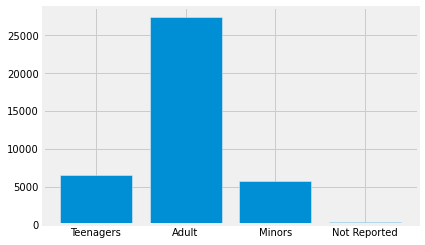

In [7]:
plt.bar(affected_age_group_counts.keys(), affected_age_group_counts.values());

In [8]:
women_affected_age_groups = family_violence.where("Gender", "Female")
men_affected_age_groups = family_violence.where("Gender", "Male")

